## Patches Extractor

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
import os
from time import time

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities_NOMXNET import *
from annotation_utilities import *

/Users/kuiqian/Github/MouseBrainAtlas_dev/src//utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python@2/2.7.16/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/local/Cellar/python@2/2.7.16/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/kuiqian/Github/venv/mousebrainatlas_virtualenv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/kuiqian/Github/venv/mousebrainatlas_virtualenv/lib/python2.7/site-packages/

Setting environment for an unknown machine. Global root paths must be set as env variables.
{'MD589': 0.46, 'MD585': 0.46}
Loaded data from saved metadata_cache for MD589


No vtk
No mcubes
Folder for stack MD585 not found, skipping.
Folder for stack MD590 not found, skipping.
Folder for stack MD591 not found, skipping.
Folder for stack MD592 not found, skipping.
Folder for stack MD593 not found, skipping.
Folder for stack MD594 not found, skipping.
Folder for stack MD595 not found, skipping.
Folder for stack MD598 not found, skipping.
Folder for stack MD599 not found, skipping.
Folder for stack MD602 not found, skipping.
Folder for stack MD603 not found, skipping.
Folder for stack MD635 not found, skipping.
Folder for stack MD653 not found, skipping.
Folder for stack MD652 not found, skipping.
Folder for stack MD642 not found, skipping.
Folder for stack MD657 not found, skipping.
Folder for stack MD658 not found, skipping.
Folder for stack MD661 not found, skipping.
Folder for stack MD662 not found, skipping.
Folder for stack CHATM2 not found, skipping.
Folder for stack CHATM3 not found, skipping.
Folder for stack UCSD001 not found, skipping.
/Users/kuiq

### Variables definition

In [4]:
win_id = 7
stack = 'MD594'

paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', \
                     'SNC', 'SNR', '3N', '4N', 'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']

all_structures = paired_structures + singular_structures

# 1: {'patch_size': 224, 'spacing': 56}
patch_loc_root = ROOT_DIR+'/CSHL_patch_locations/'+stack+'/'+stack+'_prep2_gray_win1/'
images_root = ROOT_DIR+'/CSHL_data_processed/'+stack+'/'+stack+'_prep2_thumbnail/'
raw_images_root = ROOT_DIR+'/CSHL_data_processed/'+stack+'/'+stack+'_prep2_lossless_gray/'

patch_fn_list = ! ls $patch_loc_root
image_fn_list = ! ls $images_root
raw_image_fn_list = ! ls $raw_images_root

# filename_to_section, section_to_filename = DataManager.load_sorted_filenames( stack )

In [5]:
windowing_settings

{0: {'patch_size': 34, 'spacing': 34},
 1: {'patch_size': 224, 'spacing': 56},
 2: {'comment': 'larger margin', 'patch_size': 224, 'spacing': 56},
 3: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 32},
 4: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 128},
 5: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 64},
 6: {'comment': 'twice as large patch', 'patch_size': 448, 'spacing': 64},
 7: {'comment': 'specify size/spacing in terms of microns rather than pixels',
  'patch_size_um': 103.04,
  'spacing_um': 30},
 8: {'comment': 'larger patch', 'patch_size_um': 206.08, 'spacing_um': 30},
 9: {'comment': 'larger patch', 'patch_size_um': 412.16, 'spacing_um': 30},
 10: {'comment': 'larger patch', 'patch_size_um': 824.32, 'spacing_um': 30},
 11: {'comment': 'larger patch', 'patch_size_um': 51.52, 'spacing_um': 30},
 12: {'comment': 'larger patch', 'patch_size_um': 25.76, 'spacing_um': 30}}

### Download essential files

In [6]:
def setup_download_from_s3( rel_fp, recursive=True ):
    s3_fp = 's3://mousebrainatlas-data/'+rel_fp
    local_fp = os.environ['ROOT_DIR']+rel_fp

    if os.path.exists(local_fp):
        print('ALREADY DOWNLOADED FILE')
        return 
    
    if recursive:
        ! aws s3 cp --recursive $s3_fp $local_fp
    else:
        ! aws s3 cp $s3_fp $local_fp

In [ ]:
setup_download_from_s3('CSHL_data_processed/'+stack+'/'+stack+'_prep2_lossless_gray/')

download: s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_lossless_gray.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_lossless_gray.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_2_0050_prep2_lossless_gray.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_2_0050_prep2_lossless_gray.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_2_0047_prep2_lossless_gray.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_2_0047_prep2_lossless_gray.tif
download: s3://mousebrain

download: s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_prep2_lossless_gray.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_prep2_lossless_gray.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_prep2_lossless_gray.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_prep2_lossless_gray.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_prep2_lossless_gray.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_prep2_lossless_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_prep2_lossless_gray.tif
download: s3://mousebrain

In [8]:
setup_download_from_s3('CSHL_data_processed/'+stack+'/'+stack+'_prep2_thumbnail/')

ALREADY DOWNLOADED FILE


In [10]:
setup_download_from_s3('CSHL_data_processed/'+stack+'/'+stack+'_prep2_thumbnail_mask/')

ALREADY DOWNLOADED FILE


In [11]:
setup_download_from_s3('CSHL_data_processed/'+stack+'/'+stack+'_sorted_filenames.txt', recursive=False ) 

download: s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_sorted_filenames.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_sorted_filenames.txt


In [4]:
setup_download_from_s3( 'brains_info/DEMO998.ini', recursive=False )
local_fp = os.environ['ROOT_DIR']+'brains_info/'+stack+'.ini'
! mv $ROOT_DIR/brains_info/DEMO998.ini $local_fp

download: s3://mousebrainatlas-data/brains_info/DEMO998.ini to ../../../../BstemAtlasDataBackup/ucsd_brain/brains_info/DEMO998.ini


In [10]:
!aws s3 ls s3://mousebrainatlas-data/metadata_caches/

2019-06-27 10:40:19          0 
2019-06-27 10:40:50      82610 MD585_metadata_cache.json
2019-06-27 10:40:50      84221 MD589_metadata_cache.json
2019-06-27 10:40:50      80794 MD594_metadata_cache.json


In [4]:
fn= stack+'_metadata_cache.json'
s3_fp = 's3://mousebrainatlas-data/metadata_caches/'+fn
local_fp = os.environ['ROOT_DIR']+'CSHL_data_processed/'+stack+'/'+fn
! aws s3 cp $s3_fp $local_fp

download: s3://mousebrainatlas-data/metadata_caches/MD585_metadata_cache.json to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_metadata_cache.json


In [8]:
setup_download_from_s3('CSHL_data_processed/MD585/\
MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep2_cropbox.json', recursive=False)

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep2_cropbox.json to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep2_cropbox.json


In [9]:
setup_download_from_s3('CSHL_data_processed/MD585/\
MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep2_sectionLimits.json', recursive=False)

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep2_sectionLimits.json to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep2_sectionLimits.json


In [6]:
local_fp = os.environ['ROOT_DIR']+'CSHL_labelings_v3/MD589/MD589_annotation_contours_05312018031718.hdf'
!aws s3 cp s3://mousebrainatlas-data/annotations_realigned/MD589_annotation_contours_05312018031718_prep2_corr1.hdf $local_fp

download: s3://mousebrainatlas-data/annotations_realigned/MD589_annotation_contours_05312018031718_prep2_corr1.hdf to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD589/MD589_annotation_contours_05312018031718.hdf


In [59]:
local_fp = os.environ['ROOT_DIR']+'CSHL_labelings_v3/MD585/MD585_annotation_contours_05312018041032.hdf'
! aws s3 cp s3://mousebrainatlas-data/annotations_realigned/MD585_annotation_contours_05312018041032_prep2_corr2.hdf $local_fp

download: s3://mousebrainatlas-data/annotations_realigned/MD585_annotation_contours_05312018041032_prep2_corr2.hdf to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD585/MD585_annotation_contours_05312018041032.hdf


### Identify patches based on human annotation
--script identify_patch_class_based_on_labeling_v3_human_annotations.py

In [12]:
fp, latest_timestamp = DataManager.get_annotation_filepath(stack, by_human=True, suffix='contours', \
            timestamp='latest', return_timestamp=True, annotation_rootdir=ANNOTATION_ROOTDIR, download_s3=False)
grid_index_class_lookup_fp = DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, \
                                        win_id=win_id, by_human=True, timestamp=latest_timestamp)
t0 = time.time()
if not os.path.exists(grid_index_class_lookup_fp):
    ! python identify_patch_class_based_on_labeling_v3_human_annotations.py $stack $win_id
else:
    print('ALREADY IDENTIFY PATCHES')
print(time.time()-t0)
print(grid_index_class_lookup_fp)
grid_index_class_lookup = load_hdf_v2(grid_index_class_lookup_fp)

latest timestamp:  05312018041032
ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for an unknown machine. Global root paths must be set as env variables.
{'MD589': 0.46, 'MD585': 0.46}
No vtk
No mcubes
Loaded data from saved metadata_cache for MD585
Loaded data from saved metadata_cache for MD589
Folder for stack MD590 not found, skipping.
Folder for stack MD591 not found, skipping.
Folder for stack MD592 not found, skipping.
Folder for stack MD593 not found, skipping.
Folder for stack MD594 not found, skipping.
Folder for stack MD595 not found, skipping.
Folder for stack MD598 not found, skipping.
Folder for stack MD599 not found, skipping.
Folder for stack MD602 not found, skipping.
Folder for stack MD603 not found, skipping.
Folder for stack MD635 not found, skipping.
Folder for stack MD653 not found, skipping.
Folder for stack MD652 not found, skipping.
Folder for stack MD642 not found, skipping.
Folder for stack M

IOError: File /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD585/MD585_annotation_win7_05312018041032_grid_indices_lookup.hdf does not exist

In [5]:
# Convert to x, y locations using 'all_locs'
all_locs = grid_parameters_to_sample_locations(win_id=win_id, stack=stack)

In [29]:
print(DataManager.get_image_filepath_v2.__doc__)


        Args:
            version (str): the version string.

        Returns:
            Absolute path of the image file.
        


In [42]:
fn='MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142'

In [43]:
img_fp = os.environ['ROOT_DIR'] +'CSHL_data_processed/MD585/MD585_prep2_thumbnail/'
img_fn = img_fp + fn + '_prep2_thumbnail.tif'

In [60]:
annotation= load_hdf_v2(local_fp)
print(local_fp)

/Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD585/MD585_annotation_contours_05312018041032.hdf


In [32]:
filename_to_section, section_to_filename = DataManager.load_sorted_filenames( stack )

In [46]:
section=filename_to_section['MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142']
section

272

In [47]:
section_to_filename[section]

'MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142'

In [61]:
annotations_x = []
annotations_y = []

for i in range(len(annotation)):
    section_i = annotation['section'][i]
    if section_i == section:
        vertices = annotation['vertices'][i]
        
        for coordinate in vertices:
            annotations_x.append(coordinate[0]/32)
            annotations_y.append(coordinate[1]/32)

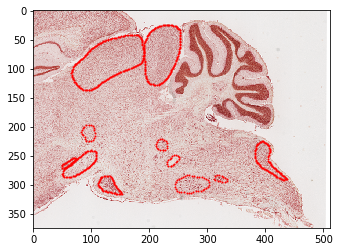

In [62]:
import cv2

img = cv2.imread(img_fn)
plt.imshow( img, cmap='gray' )

plt.scatter(annotations_x, annotations_y, color='r', s=1)

### List valid patches according to structures and sections

In [6]:
all_patch_locations = {}

for structure in all_structures:    
    valid_sections = []
    try:
        possibly_valid_sections = grid_index_class_lookup[structure].keys()
    except Exception as e:
        print(e)
        print('SKIPPING: '+structure)
        continue
        
    all_patch_locations[structure] = {}

    # Make a list of all sections where patches actually exist
    for section in possibly_valid_sections:
        # If this table entry is a numpy array, then it is filled with data. Otherwise (float) it is 'nan'
        if isinstance(grid_index_class_lookup[structure][section], np.ndarray):
            valid_sections.append( section )
            
    for section in valid_sections:
        valid_patch_indices = grid_index_class_lookup[structure][ section ]
        patch_coors =  all_locs[ valid_patch_indices ]#.tolist()
        all_patch_locations[structure][int(section)] = patch_coors

'6N'
SKIPPING: 6N
'SNC'
SKIPPING: SNC
'4N'
SKIPPING: 4N
'10N'
SKIPPING: 10N


### Generate valid patches based on annotations directly

In [7]:
local_fp, latest_timestamp = DataManager.get_annotation_filepath(stack, by_human=True, suffix='contours', \
            timestamp='latest', return_timestamp=True, annotation_rootdir=ANNOTATION_ROOTDIR, download_s3=False)
annotation= load_hdf_v2(local_fp)

latest timestamp:  05312018031718


In [31]:
annotation.head()

2276


,class,creator,edits,filename,id,label_position,name,orientation,parent_structure,resolution,section,side,side_manually_assigned,time_created,type,vertices
100157269992733,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205,100157269992733,"[7276.284859855292, 7546.993140571727]",VCA,sagittal,[],raw,367,R,False,09152016033619,confirmed,"[[7476.17555322816, 7984.977043818117], [7316...."
100472025966132,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-N51-2015.07.30-19.28.17_MD589_2_0152,100472025966132,"[10644.460680035572, 10933.363273374733]",IO,sagittal,[],raw,260,R,False,09122016211223,confirmed,"[[10135.947729853007, 10933.270657973084], [99..."
10063296125941,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-N55-2015.07.30-19.49.42_MD589_3_0165,10063296125941,"[11608.415904106292, 10622.075455632674]",LRt,sagittal,[],raw,286,R,False,09152016024654,confirmed,"[[11989.668055220041, 11086.806412829588], [11..."
101105413939417,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-N54-2015.07.30-19.44.32_MD589_1_0160,101105413939417,"[11080.859853501861, 10385.125821328125]",LRt,sagittal,[],raw,276,R,False,09152016024654,confirmed,"[[11805.602660507782, 10950.894932558649], [11..."
101214741356495,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'053...",MD589-N37-2015.07.30-18.32.51_MD589_1_0109,101214741356495,"[5328.361431529123, 1855.4492753623208]",SC,sagittal,[],raw,202,S,False,05312018021355,intersected,"[[4068.2608695651943, 3084.434782608698], [398..."


In [33]:
prep_id = 2
contours = annotation[(annotation['orientation'] == 'sagittal') & (annotation['resolution'] == 'raw')]
contours = contours.drop_duplicates(subset=['section', 'name', 'side', 'filename', 'resolution', 'creator'])

In [34]:
contours_grouped = contours.groupby('name')

In [36]:
for struc, cnt_group in contours_grouped:
    polygons = [(contour['section'], contour['vertices']) for contour_id, contour in cnt_group.iterrows()]
type(polygons)

list

In [168]:
section = 103
polygons = [(contour['section'], contour['vertices']) \
            for contour_id, contour in contours_grouped.get_group('VCP').iterrows() ]
for contour_id, contour in polygons:
    if contour_id==section:
        polygon = contour

In [7]:
margin_um = 200
margin = margin_um / XY_PIXEL_DISTANCE_LOSSLESS
30/XY_PIXEL_DISTANCE_LOSSLESS, 100/XY_PIXEL_DISTANCE_LOSSLESS

(65.21739130434783, 217.39130434782606)

In [170]:
[left, right, up, down] = [int(max(min(polygon[:,0])-margin,0)), 
                           int(min(np.ceil(max(polygon[:,0])+margin),m)),
                           int(max(min(polygon[:,1])-margin,0)), 
                           int(min(np.ceil(max(polygon[:,1])+margin),n))]
print(left, right, up, down)

(7543, 9391, 7733, 9364)


In [171]:
t0 = time.time()
# locations = [(i,j) for i in range(left,right+1) for j in range(up,down+1)]
# locations = np.asarray(locations)
xs, ys = np.meshgrid(np.arange(left, right+1), np.arange(up, down+1),
                     indexing='xy')
locations = np.c_[xs.flat, ys.flat]
print(locations.shape,type(locations))
print(time.time()-t0)
path = Path(polygon)
indices_inside = np.where(path.contains_points(locations))[0]
print(type(indices_inside))
print(time.time()-t0)
len(locations[indices_inside])

((3017568, 2), <type 'numpy.ndarray'>)
0.0572838783264
<type 'numpy.ndarray'>
0.23091006279


444956

444956
2.97899508476
(11936, 15520)
uint8
3.18129706383
(1632, 1849)


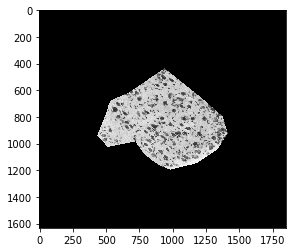

In [172]:
indices_in = locations[indices_inside]
x_raw =indices_in[:,0]-left
y_raw =indices_in[:,1]-up
print(len(indices_in))
t0=time.time()
img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif' , 2)
print(time.time()-t0)
m, n = img.shape
print(m,n)
mask = np.zeros((down-up+1, right-left+1))
for i in range(len(indices_in)):
    mask[y_raw[i],x_raw[i]]=1
mask=mask.astype(np.uint8)
print(mask.dtype)
print(time.time()-t0)
patch = img[up:down+1,left:right+1]*mask
print(patch.shape)
#plt.figure( figsize=(50,50) )
plt.imshow( patch, cmap='gray')
#plt.imshow(mask, cmap='gray')

In [176]:
t0 = time.time()
# xs, ys = np.meshgrid(np.arange(left, right+1), np.arange(up, down+1),
#                      indexing='xy')
# locations = np.c_[xs.flat, ys.flat]
# print(locations.shape,type(locations))
# print(time.time()-t0)
surround = Polygon(polygon).buffer(margin, resolution=2)
path = Path(list(surround.exterior.coords))
indices_sur = np.where(path.contains_points(locations))[0]
indices_outside = np.setdiff1d(indices_sur, indices_inside)
print(type(indices_out))
print(time.time()-t0)
len(locations[indices_outside])

<type 'numpy.ndarray'>
0.38019990921


1665626

1665626
uint8
0.70954990387
(1632, 1849)


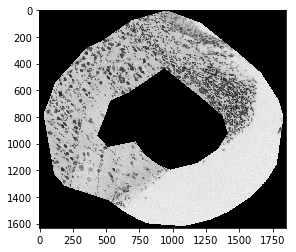

In [177]:
indices_out = locations[indices_outside]
x_raw =indices_out[:,0]-left
y_raw =indices_out[:,1]-up
print(len(indices_out))
t0=time.time()
mask = np.zeros((down-up+1, right-left+1))
for i in range(len(indices_out)):
    mask[y_raw[i],x_raw[i]]=1
mask=mask.astype(np.uint8)
print(mask.dtype)
print(time.time()-t0)
patch = img[up:down+1,left:right+1]*mask
print(patch.shape)
#plt.figure( figsize=(50,50) )
plt.imshow( patch, cmap='gray')

### Save regions to files

In [183]:
# Regions
t0 = time.time()
margin_um = 200
margin = margin_um / XY_PIXEL_DISTANCE_LOSSLESS
! mkdir $ROOT_DIR/CSHL_regions
! mkdir $ROOT_DIR/CSHL_regions/$stack
for structure in all_structures:
    t1 = time.time()
    posi_path = ROOT_DIR+'/CSHL_regions/'+stack+'/'+structure
    nega_path = posi_path+'_surround_200um_noclass'
    if os.path.exists(posi_path):
        print(structure+' ALREADY EXIST')
        continue
    else:
        ! mkdir $posi_path
        ! mkdir $nega_path
    
    polygons = [(contour['section'], contour['vertices']) \
                for contour_id, contour in contours_grouped.get_group(structure).iterrows() ]
    
    for contour_id, contour in polygons:
        section = contour_id
        polygon = contour
        img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif' , 2)
        m, n = img.shape
        [left, right, up, down] = [int(max(min(polygon[:,0])-margin,0)), 
                                   int(min(np.ceil(max(polygon[:,0])+margin),n-1)),
                                   int(max(min(polygon[:,1])-margin,0)), 
                                   int(min(np.ceil(max(polygon[:,1])+margin),m-1))]
        xs, ys = np.meshgrid(np.arange(left, right+1), np.arange(up, down+1), indexing='xy')
        locations = np.c_[xs.flat, ys.flat]
        
        # Positive regions
        path = Path(polygon)
        indices_inside = np.where(path.contains_points(locations))[0]
        indices_in = locations[indices_inside]
        x_raw =indices_in[:,0]-left
        y_raw =indices_in[:,1]-up
        mask = np.zeros((down-up+1, right-left+1))
        for i in range(len(indices_in)):
            mask[y_raw[i],x_raw[i]]=1
        mask=mask.astype(np.uint8)
        patch = img[up:down+1,left:right+1]*mask
        filename=posi_path+'/'+str(section)+'.tif'
        cv2.imwrite(filename, patch)
        
        # Negative regions
        surround = Polygon(polygon).buffer(margin, resolution=2)
        path = Path(list(surround.exterior.coords))
        indices_sur = np.where(path.contains_points(locations))[0]
        indices_outside = np.setdiff1d(indices_sur, indices_inside)
        indices_out = locations[indices_outside]
        x_raw =indices_out[:,0]-left
        y_raw =indices_out[:,1]-up
        mask = np.zeros((down-up+1, right-left+1))
        for i in range(len(indices_out)):
            mask[y_raw[i],x_raw[i]]=1
        mask=mask.astype(np.uint8)
        patch = img[up:down+1,left:right+1]*mask
        filename=nega_path+'/'+str(section)+'.tif'
        cv2.imwrite(filename, patch)
    print(structure + ' finished in %5.1f seconds' % (time.time() - t1))
print('Finished in %5.1f seconds' % (time.time() - t0))

mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain//CSHL_regions: File exists
mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain//CSHL_regions/MD589: File exists
5N ALREADY EXIST
6N ALREADY EXIST
7N ALREADY EXIST
7n ALREADY EXIST
Amb ALREADY EXIST
LC ALREADY EXIST
LRt finished in 356.9 seconds
Pn finished in 614.9 seconds
Tz finished in 211.0 seconds
VLL finished in 348.1 seconds
RMC finished in 235.6 seconds
SNC finished in 303.0 seconds
SNR finished in 972.8 seconds
3N finished in  95.4 seconds
4N finished in  32.6 seconds
Sp5I finished in 491.3 seconds
Sp5O finished in 657.8 seconds
Sp5C finished in 1169.6 seconds
PBG finished in  82.0 seconds
10N finished in 174.2 seconds
VCA finished in 362.8 seconds
VCP finished in 229.5 seconds
DC finished in 491.2 seconds
AP finished in  54.6 seconds
12N finished in 216.3 seconds
RtTg finished in  77.8 seconds
SC finished in 3062.8 seconds
IC finished in 2004.8 seconds


In [7]:
s3_fp = 's3://mousebrainatlas-data/'+'CSHL_regions/'+stack
local_fp = os.environ['ROOT_DIR']+'/CSHL_regions/'+stack
! aws s3 cp --recursive $local_fp $s3_fp

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/.DS_Store to s3://mousebrainatlas-data/CSHL_regions/MD589/.DS_Store
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N/209.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N/209.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N/211.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N/211.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N/200.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N/200.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N/212.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N/212.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N/201.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N/201.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N/214.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N/214.tif
upl

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N_surround_200um_noclass/215.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N_surround_200um_noclass/215.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N_surround_200um_noclass/217.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N_surround_200um_noclass/217.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N_surround_200um_noclass/216.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N_surround_200um_noclass/216.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N_surround_200um_noclass/218.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N_surround_200um_noclass/218.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/10N_surround_200um_noclass/219.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/10N_surround_200um_noclass/219.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N/220.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N/220.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N/228.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N/228.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N/226.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N/226.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N/230.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N/230.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N/227.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N/227.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N/229.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N/229.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N/222.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N/222.tif

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N_surround_200um_noclass/236.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N_surround_200um_noclass/236.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N_surround_200um_noclass/232.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N_surround_200um_noclass/232.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N_surround_200um_noclass/219.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N_surround_200um_noclass/219.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N_surround_200um_noclass/233.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N_surround_200um_noclass/233.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/12N_surround_200um_noclass/234.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/12N_surround_200um_noclass/234.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/3N_surround_200um_noclass/223.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/3N_surround_200um_noclass/223.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/3N_surround_200um_noclass/213.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/3N_surround_200um_noclass/213.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/3N_surround_200um_noclass/228.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/3N_surround_200um_noclass/228.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/3N_surround_200um_noclass/219.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/3N_surround_200um_noclass/219.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/3N_surround_200um_noclass/230.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/3N_surround_200um_noclass/230.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/5N_surround_200um_noclass/292.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/5N_surround_200um_noclass/292.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/5N_surround_200um_noclass/291.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/5N_surround_200um_noclass/291.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/5N_surround_200um_noclass/293.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/5N_surround_200um_noclass/293.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/5N_surround_200um_noclass/290.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/5N_surround_200um_noclass/290.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/5N_surround_200um_noclass/296.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/5N_surround_200um_noclass/296.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N/170.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N/170.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N/169.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N/169.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N/173.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N/173.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N/174.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N/174.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N/168.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N/168.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N/175.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N/175.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N/178.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N/178.tif
upload: ../..

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/179.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/179.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/187.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/187.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/189.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/189.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/191.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/191.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/184.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/184.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/302.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/302.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/307.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/307.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/306.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/306.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/308.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/308.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/7N_surround_200um_noclass/310.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/7N_surround_200um_noclass/310.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/AP_surround_200um_noclass/229.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/AP_surround_200um_noclass/229.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Amb/296.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Amb/296.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Amb/297.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Amb/297.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Amb/299.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Amb/299.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Amb_surround_200um_noclass/164.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Amb_surround_200um_noclass/164.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Amb_surround_200um_noclass/167.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Amb_surround_200um_noclass/167.tif
upload

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/144.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/144.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/143.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/143.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/145.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/145.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/146.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/146.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/148.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/148.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/149.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/149.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/150.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/150.tif
upload: ../..

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/343.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/343.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/345.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/345.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/350.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/350.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/349.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/349.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/341.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/341.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/347.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/347.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC/348.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC/348.tif
upload: ../..

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/140.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/140.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/143.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/143.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/145.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/145.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/146.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/146.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/144.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/144.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/328.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/328.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/327.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/327.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/316.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/316.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/326.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/326.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/DC_surround_200um_noclass/331.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/DC_surround_200um_noclass/331.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/139.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/139.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/143.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/143.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/145.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/145.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/144.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/144.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/147.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/147.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/148.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/148.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/146.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/146.tif
upload: ../..

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/250.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/250.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/259.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/259.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/257.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/257.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/260.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/260.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/264.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/264.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/263.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/263.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC/258.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC/258.tif
upload: ../..

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/126.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/126.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/123.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/123.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/128.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/128.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/125.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/125.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/130.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/130.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/213.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/213.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/217.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/217.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/215.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/215.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/216.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/216.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/219.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/219.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/261.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/261.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/256.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/256.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/254.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/254.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/258.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/258.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/251.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/251.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/302.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/302.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/305.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/305.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/308.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/308.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/307.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/307.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/IC_surround_200um_noclass/310.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/IC_surround_200um_noclass/310.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LC_surround_200um_noclass/267.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LC_surround_200um_noclass/267.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LC_surround_200um_noclass/270.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LC_surround_200um_noclass/270.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LC_surround_200um_noclass/181.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LC_surround_200um_noclass/181.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LC_surround_200um_noclass/271.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LC_surround_200um_noclass/271.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LC_surround_200um_noclass/268.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LC_surround_200um_noclass/268.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt/184.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt/184.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt/273.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt/273.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt/276.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt/276.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt/275.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt/275.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt/274.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt/274.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt/278.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt/278.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt/277.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt/277.tif

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/179.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/179.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/175.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/175.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/173.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/173.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/181.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/181.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/159.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/159.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/302.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/302.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/281.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/281.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/293.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/293.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/301.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/301.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/LRt_surround_200um_noclass/298.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/LRt_surround_200um_noclass/298.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/PBG_surround_200um_noclass/135.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/PBG_surround_200um_noclass/135.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/PBG_surround_200um_noclass/134.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/PBG_surround_200um_noclass/134.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/PBG_surround_200um_noclass/133.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/PBG_surround_200um_noclass/133.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/PBG_surround_200um_noclass/130.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/PBG_surround_200um_noclass/130.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/PBG_surround_200um_noclass/129.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/PBG_surround_200um_noclass/129.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn/291.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn/291.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn/290.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn/290.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn/286.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn/286.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn/295.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn/295.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn/293.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn/293.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn/294.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn/294.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/177.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/P

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/222.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/222.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/215.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/215.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/220.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/220.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/224.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/224.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/180.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/180.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/284.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/284.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/280.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/280.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/285.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/285.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/282.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/282.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Pn_surround_200um_noclass/281.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Pn_surround_200um_noclass/281.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RMC_surround_200um_noclass/239.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RMC_surround_200um_noclass/239.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RMC_surround_200um_noclass/242.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RMC_surround_200um_noclass/242.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RMC_surround_200um_noclass/247.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RMC_surround_200um_noclass/247.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RMC_surround_200um_noclass/244.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RMC_surround_200um_noclass/244.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RMC_surround_200um_noclass/246.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RMC_surround_200um_noclass/246.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RtTg_surround_200um_noclass/223.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RtTg_surround_200um_noclass/223.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RtTg_surround_200um_noclass/240.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RtTg_surround_200um_noclass/240.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RtTg_surround_200um_noclass/225.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RtTg_surround_200um_noclass/225.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RtTg_surround_200um_noclass/260.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RtTg_surround_200um_noclass/260.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/RtTg_surround_200um_noclass/250.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/RtTg_surround_200um_noclass/250.tif
upload: ../../../../BstemAtlasDataBackup/ucsd

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC/230.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC/230.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC/231.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC/231.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC/234.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC/234.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC/236.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC/236.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC/233.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC/233.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC/239.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC/239.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC/235.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC/235.tif
upload: ../..

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/156.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/156.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/157.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/157.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/158.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/158.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/161.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/161.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/155.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/155.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/199.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/199.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/192.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/192.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/196.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/196.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/205.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/205.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/201.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/201.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/245.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/245.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/242.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/242.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/230.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/230.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/240.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/240.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/246.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/246.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/288.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/288.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/285.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/285.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/292.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/292.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/290.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/290.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SC_surround_200um_noclass/291.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SC_surround_200um_noclass/291.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC/173.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC/173.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC/172.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC/172.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC/165.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC/165.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC/175.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC/175.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC/174.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC/174.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC/176.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC/176.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC/177.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC/177.tif

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC/312.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC/312.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/146.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/146.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/145.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/145.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/148.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/148.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/151.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/151.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/149

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/275.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/275.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/190.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/190.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/278.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/278.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/277.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/277.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNC_surround_200um_noclass/276.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNC_surround_200um_noclass/276.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR/174.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR/174.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR/264.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR/264.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR/190.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR/190.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR/186.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR/186.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR/265.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR/265.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR/267.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR/267.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR/266.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR/266.tif

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/165.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/165.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/170.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/170.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/171.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/171.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/173.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/173.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/168.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/168.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/286.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/286.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/285.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/285.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/291.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/291.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/284.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/284.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/SNR_surround_200um_noclass/274.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/SNR_surround_200um_noclass/274.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/130.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/130.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/129.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/129.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/131.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/131.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/133.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/133.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/134.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/134.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/135.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/135.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/137.tif to s3://mousebrainatlas-data/CSHL_regions/MD58

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/302.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/302.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/301.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/301.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/293.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/293.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/297.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/297.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/298.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/298.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/304.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/304.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/299.tif to s3://mousebrainatlas-data/CSHL_regions/MD58

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/146.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/146.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/148.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/148.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/152.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/152.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/153.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/153.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/156.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/156.tif
upload: ../../../../BstemAtlasDataBackup/ucsd

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C/307.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C/307.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/195.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/195.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/194.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/194.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/197.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/197.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_noclass/256.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5C_surround_200um_noclass/256.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5C_surround_200um_

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I/126.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I/126.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I/132.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I/132.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I/130.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I/130.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I/131.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I/131.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I/137.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I/137.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I/136.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I/136.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I/141.tif to s3://mousebrainatlas-data/CSHL_regions/MD58

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I_surround_200um_noclass/116.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I_surround_200um_noclass/116.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I_surround_200um_noclass/310.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I_surround_200um_noclass/310.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I_surround_200um_noclass/311.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I_surround_200um_noclass/311.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I_surround_200um_noclass/309.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I_surround_200um_noclass/309.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5I_surround_200um_noclass/307.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5I_surround_200um_noclass/307.tif
upload: ../../../../BstemAtlasDataBackup/ucsd

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/119.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/119.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O/322.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O/322.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/123.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/123.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/124.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/124.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/125.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/125.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/138.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/138.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/317.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/317.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/315.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/315.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/319.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/319.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Sp5O_surround_200um_noclass/321.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Sp5O_surround_200um_noclass/321.tif
upload: ../../../../BstemAtlasDataBackup/ucsd

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Tz/254.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Tz/254.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Tz/256.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Tz/256.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Tz/255.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Tz/255.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Tz/259.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Tz/259.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Tz/258.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Tz/258.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Tz/261.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Tz/261.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Tz/262.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Tz/262.tif
upload: ../..

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA/339.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCA/339.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA/121.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCA/121.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/Tz_surround_200um_noclass/222.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/Tz_surround_200um_noclass/222.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA/344.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCA/344.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA/346.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCA/346.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA/348.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCA/348.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA/345.tif to s3://mousebr

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA_surround_200um_noclass/96.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCA_surround_200um_noclass/96.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA_surround_200um_noclass/98.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCA_surround_200um_noclass/98.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCP/104.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCP/104.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCP/103.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCP/103.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCA_surround_200um_noclass/97.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCA_surround_200um_noclass/97.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCP/105.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCP/105.tif
upload: ..

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCP_surround_200um_noclass/355.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCP_surround_200um_noclass/355.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VLL/131.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VLL/131.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCP_surround_200um_noclass/357.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCP_surround_200um_noclass/357.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCP_surround_200um_noclass/354.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCP_surround_200um_noclass/354.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VCP_surround_200um_noclass/359.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VCP_surround_200um_noclass/359.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VLL/132.tif to s3://mousebrain

upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VLL_surround_200um_noclass/164.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VLL_surround_200um_noclass/164.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VLL_surround_200um_noclass/163.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VLL_surround_200um_noclass/163.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VLL_surround_200um_noclass/168.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VLL_surround_200um_noclass/168.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VLL_surround_200um_noclass/157.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VLL_surround_200um_noclass/157.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_regions/MD589/VLL_surround_200um_noclass/160.tif to s3://mousebrainatlas-data/CSHL_regions/MD589/VLL_surround_200um_noclass/160.tif
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSH

### Patch examples display

125
Number of Positive Patches: 89


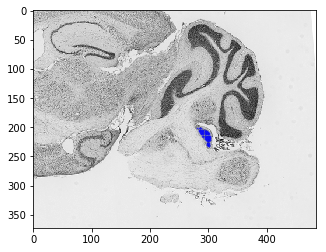

In [7]:
x_pts_str = []
y_pts_str = []
x_raw = []
y_raw = []
x_offset = 0 #-50
y_offset = 0 #-11
structure = 'DC'
section = all_patch_locations[structure].keys()[20]
print(section)
valid_patch_indices = grid_index_class_lookup[structure][ section ]
print 'Number of Positive Patches:',len(valid_patch_indices)

for x, y in all_locs[valid_patch_indices]:
    x_raw.append( (float(x)) )
    y_raw.append( (float(y)) )
    x_pts_str.append( (float(x)/32)+x_offset )
    y_pts_str.append( (float(y)/32)+y_offset )
    
img = cv2.imread( images_root+section_to_filename[section]+'_prep2_thumbnail.tif' , 2)
#plt.figure( figsize=(50,50) )
plt.imshow( img, cmap='gray')

plt.scatter(x_pts_str, y_pts_str, s=1, c='blue', alpha=.5)

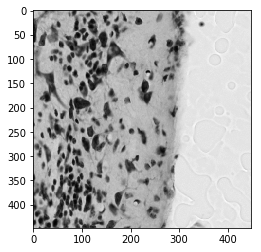

In [9]:

img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif', 2)
index = 50
x = int( float( all_patch_locations[structure][section][index][0] ) ) 
y = int( float( all_patch_locations[structure][section][index][1] ) ) 

patch = img[y:y+448,x:x+448]


plt.imshow( patch, cmap='gray')

In [18]:
n_choose = min(len(all_patch_locations[structure][section]),10)
indices_choose = np.random.choice(range(len(all_patch_locations[structure][section])),n_choose,replace=False)
patches_choose = all_patch_locations[structure][section][indices_choose,:]
patches_choose, patches_choose[0][0]

(array([[9147, 6742],
        [9602, 7132],
        [9082, 6417],
        [9147, 6677],
        [9082, 6742],
        [9342, 6742],
        [9017, 6417],
        [9212, 6612],
        [9212, 6482],
        [9342, 6677]]), 9147)

125
Number of Positive Patches: 541
(8891, 9775, 6375, 7599)
(8891, 9775, 6375, 7599)
uint8
(541, 541)
uint8
(1259, 919)


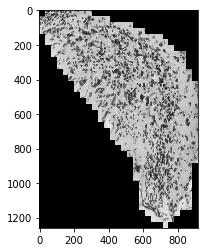

In [30]:
x_pts_str = []
y_pts_str = []
x_raw = []
y_raw = []
offset = 34
structure = 'DC'
section = all_patch_locations[structure].keys()[20]
print(section)
valid_patch_indices = grid_index_class_lookup[structure][ section ]
print 'Number of Positive Patches:',len(valid_patch_indices)

[left, right, up, down] = [int(min(all_patch_locations[structure][section][:,0])), 
                           int(max(all_patch_locations[structure][section][:,0])),
                           int(min(all_patch_locations[structure][section][:,1])), 
                           int(max(all_patch_locations[structure][section][:,1]))]

for x, y in all_locs[valid_patch_indices]:
    x_raw.append( (int(x-left)) )
    y_raw.append( (int(y-up)) )
    x_pts_str.append( (float(x)/32)+x_offset )
    y_pts_str.append( (float(y)/32)+y_offset )

print(left, right, up, down)
img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif' , 2)
print(img.dtype)
mask = np.zeros((down-up+1+offset, right-left+1+offset))
print(len(x_raw),len(y_raw))
for i in range(len(all_locs[valid_patch_indices])):
    mask[y_raw[i]:y_raw[i]+offset,x_raw[i]:x_raw[i]+offset]=1
mask=mask.astype(np.uint8)
print(mask.dtype)
patch = img[up:down+1+offset,left:right+1+offset]*mask#[0:down-up+1,0:right-left+1]
print(patch.shape)
#plt.figure( figsize=(50,50) )
plt.imshow( patch, cmap='gray')
#plt.imshow(mask, cmap='gray')

#plt.scatter(x_raw, y_raw, s=1, c='blue', alpha=.5)

### Save patches to files

In [32]:
# Regions
offset = 34
! mkdir $ROOT_DIR/CSHL_patches
! mkdir $ROOT_DIR/CSHL_patches/$stack
for structure in all_patch_locations.keys():
    savepath=ROOT_DIR+'/CSHL_patches/'+stack+'/'+structure
    if os.path.exists(savepath):
        print(structure+' ALREADY EXIST')
        continue
    else:
        ! mkdir $savepath
    for section in all_patch_locations[structure].keys():
        img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif', 2)
        [left, right, up, down] = [int(min(all_patch_locations[structure][section][:,0])), 
                                   int(max(all_patch_locations[structure][section][:,0])),
                                   int(min(all_patch_locations[structure][section][:,1])), 
                                   int(max(all_patch_locations[structure][section][:,1]))]
        mask = np.zeros((down-up+1+offset, right-left+1+offset))
        for x, y in all_patch_locations[structure][section]:
            x = int( x-left ) 
            y = int( y-up ) 
            mask[y:y+offset,x:x+offset]=1
        mask=mask.astype(np.uint8)
        patch = img[up:down+1+offset,left:right+1+offset]*mask
        filename=savepath+'/'+str(section)+'.tif'
        cv2.imwrite(filename, patch)


mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain//CSHL_patches: File exists
7N ALREADY EXIST


In [11]:
# Patches generated by sliding windows
t0=time.time()
x_offset = 0 #-1600
y_offset = 0 #-352
! mkdir $ROOT_DIR/CSHL_patches_200
! mkdir $ROOT_DIR/CSHL_patches_200/$stack
for structure in all_patch_locations.keys():
    savepath=ROOT_DIR+'/CSHL_patches_200/'+stack+'/'+structure
    if os.path.exists(savepath):
        print(structure+' ALREADY EXIST')
        continue
    else:
        ! mkdir $savepath
    for section in all_patch_locations[structure].keys():
        img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif', 2)
        n_choose = min(len(all_patch_locations[structure][section]),10)
        indices_choose = np.random.choice(range(len(all_patch_locations[structure][section])),n_choose,replace=False)
        patches_choose = all_patch_locations[structure][section][indices_choose,:]
        for index in range(n_choose):
            x = int( float( patches_choose[index][0] ) ) + x_offset
            y = int( float( patches_choose[index][1] ) ) + y_offset
            patch = img[y:y+448,x:x+448]
            filename=savepath+'/'+str(section)+'_'+str(index)+'.tif'
            cv2.imwrite(filename, patch)
    print(time.time()-t0)

105.624695063
248.758334875
516.602051973
720.699126959
816.927419901
868.633401871
1079.88011789
1095.89926004
1150.13400388
7N ALREADY EXIST
1178.85406709
1259.29421806
1376.80989099
1521.9100709
1680.42764902
1978.23824286
2078.41169095
2107.90077591
2147.01982093
2304.59821486
2703.70048809
2843.49883199
2851.50121307
2929.68393302
2937.96034098
3190.44006801
3574.93132591
3606.87881088


## Negative patches

In [12]:
all_patch_locations = {}

for structure in all_structures: 
    structure=structure+'_surround_500um_noclass'
    valid_sections = []
    try:
        possibly_valid_sections = grid_index_class_lookup[structure].keys()
    except Exception as e:
        print(e)
        print('SKIPPING: '+structure)
        continue
        
    all_patch_locations[structure] = {}

    # Make a list of all sections where patches actually exist
    for section in possibly_valid_sections:
        # If this table entry is a numpy array, then it is filled with data. Otherwise (float) it is 'nan'
        if isinstance(grid_index_class_lookup[structure][section], np.ndarray):
            valid_sections.append( section )
            
    for section in valid_sections:
        valid_patch_indices = grid_index_class_lookup[structure][ section ]
        patch_coors =  all_locs[ valid_patch_indices ]#.tolist()
        all_patch_locations[structure][int(section)] = patch_coors

In [48]:
# Regions
offset = 34
! mkdir $ROOT_DIR/CSHL_patches
! mkdir $ROOT_DIR/CSHL_patches/$stack
for structure in all_patch_locations.keys():
    savepath=ROOT_DIR+'/CSHL_patches/'+stack+'/'+structure
    if os.path.exists(savepath):
        print(structure+' ALREADY EXIST')
        continue
    else:
        ! mkdir $savepath
    for section in all_patch_locations[structure].keys():
        img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif', 2)
        [left, right, up, down] = [int(min(all_patch_locations[structure][section][:,0])), 
                                   int(max(all_patch_locations[structure][section][:,0])),
                                   int(min(all_patch_locations[structure][section][:,1])), 
                                   int(max(all_patch_locations[structure][section][:,1]))]
        mask = np.zeros((down-up+1+offset, right-left+1+offset))
        for x, y in all_patch_locations[structure][section]:
            x = int( x-left ) 
            y = int( y-up ) 
            mask[y:y+offset,x:x+offset]=1
        mask=mask.astype(np.uint8)
        if img.shape[0]>=down+1+offset and img.shape[1]>=right+1+offset:
            patch = img[up:down+1+offset,left:right+1+offset]*mask
        else:
            xmax = min(img.shape[1],right+1+offset)
            ymax = min(img.shape[0],down+1+offset)
            patch = img[up:ymax,left:xmax]*mask[:ymax-up,:xmax-left]
        filename=savepath+'/'+str(section)+'.tif'
        cv2.imwrite(filename, patch)


mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain//CSHL_patches: File exists
mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain//CSHL_patches/MD589: File exists
6N_surround_200um_noclass ALREADY EXIST
5N_surround_200um_noclass ALREADY EXIST
3N_surround_200um_noclass ALREADY EXIST
7n_surround_200um_noclass ALREADY EXIST
SC_surround_200um_noclass ALREADY EXIST
DC_surround_200um_noclass ALREADY EXIST
4N_surround_200um_noclass ALREADY EXIST
LRt_surround_200um_noclass ALREADY EXIST
IC_surround_200um_noclass ALREADY EXIST
SNR_surround_200um_noclass ALREADY EXIST
VLL_surround_200um_noclass ALREADY EXIST
Amb_surround_200um_noclass ALREADY EXIST
Sp5I_surround_200um_noclass ALREADY EXIST
RMC_surround_200um_noclass ALREADY EXIST
VCP_surround_200um_noclass ALREADY EXIST
AP_surround_200um_noclass ALREADY EXIST
12N_surround_200um_noclass ALREADY EXIST
VCA_surround_200um_noclass ALREADY EXIST
PBG_surround_200um_noclass ALREADY EXIST
Tz_surround_200um_noclass ALREADY EXIST
Sp5O_surround_200um_n

In [47]:
print(left, right,up,down)
np.zeros((down-up+1+offset, right-left+1+offset)).shape
print(down-up+1+offset,right-left+1+offset)
img[up:down+1+offset,left:right+1+offset].shape
print(img.shape[1],right+1+offset)
mask[:2,:2]
structure

(12971, 15487, 8993, 11203)
(2245, 2551)
(15520, 15522)


'Sp5C_surround_200um_noclass'

Number of Negative Patches: 1585


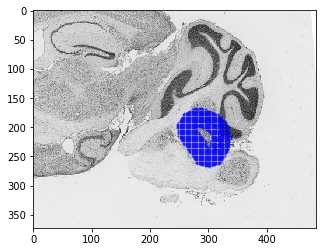

In [13]:
x_pts_str = []
y_pts_str = []
x_raw = []
y_raw = []
# x_offset = -50
# y_offset = -11
structure = 'DC'+'_surround_500um_noclass'
section = all_patch_locations[structure].keys()[20]
valid_patch_indices = grid_index_class_lookup[structure][ section ]
print 'Number of Negative Patches:',len(valid_patch_indices)

for x, y in all_locs[valid_patch_indices]:
    x_raw.append( (float(x)) )
    y_raw.append( (float(y)) )
    x_pts_str.append( (float(x)/32)+x_offset )
    y_pts_str.append( (float(y)/32)+y_offset )
    
img = cv2.imread( images_root+section_to_filename[section]+'_prep2_thumbnail.tif' , 2)
#plt.figure( figsize=(50,50) )
plt.imshow( img, cmap='gray')

plt.scatter(x_pts_str, y_pts_str, s=1, c='blue', alpha=.5)

Number of Negative Patches: 1788
(8449, 10217, 5933, 8041)
uint8
(1788, 1788)
uint8
(2143, 1803)


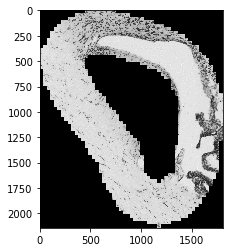

In [34]:
x_pts_str = []
y_pts_str = []
x_raw = []
y_raw = []
offset = 34
structure = 'DC'+'_surround_500um_noclass'
section = all_patch_locations[structure].keys()[20]
valid_patch_indices = grid_index_class_lookup[structure][ section ]
print 'Number of Negative Patches:',len(valid_patch_indices)

[left, right, up, down] = [int(min(all_locs[valid_patch_indices][:,0])), int(max(all_locs[valid_patch_indices][:,0])), \
                           int(min(all_locs[valid_patch_indices][:,1])), int(max(all_locs[valid_patch_indices][:,1]))]

for x, y in all_locs[valid_patch_indices]:
    x_raw.append( (int(x-left)) )
    y_raw.append( (int(y-up)) )
    x_pts_str.append( (float(x)/32)+x_offset )
    y_pts_str.append( (float(y)/32)+y_offset )
    
print(left, right, up, down)
img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif' , 2)
print(img.dtype)
mask = np.zeros((down-up+1+offset, right-left+1+offset))
print(len(x_raw),len(y_raw))
for i in range(len(all_locs[valid_patch_indices])):
    mask[y_raw[i]:y_raw[i]+offset,x_raw[i]:x_raw[i]+offset]=1
mask=mask.astype(np.uint8)
print(mask.dtype)
patch = img[up:down+1+offset,left:right+1+offset]*mask#[0:down-up+1,0:right-left+1]
print(patch.shape)
#plt.figure( figsize=(50,50) )
plt.imshow( patch, cmap='gray')
#plt.imshow(mask, cmap='gray')

#plt.scatter(x_raw, y_raw, s=1, c='blue', alpha=.5)

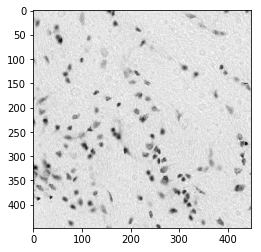

In [14]:
img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif', 2)
index = 20
x = int( float( all_patch_locations[structure][section][index][0] ) ) + x_offset*32
y = int( float( all_patch_locations[structure][section][index][1] ) ) + y_offset*32

patch = img[y:y+448,x:x+448]


plt.imshow( patch, cmap='gray')

In [15]:
# x_offset = -1600
# y_offset = -352
t0=time.time()
for structure in all_patch_locations.keys():
    savepath=ROOT_DIR+'/CSHL_patches_200/'+stack+'/'+structure
    if os.path.exists(savepath):
        print(structure+' ALREADY EXIST')
        continue
    else:
        ! mkdir $savepath
    for section in all_patch_locations[structure].keys():
        img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif', 2)
        n_choose = min(len(all_patch_locations[structure][section]),10)
        indices_choose = np.random.choice(range(len(all_patch_locations[structure][section])),n_choose,replace=False)
        patches_choose = all_patch_locations[structure][section][indices_choose,:]
        for index in range(n_choose):
            x = int( float( patches_choose[index][0] ) ) + x_offset
            y = int( float( patches_choose[index][1] ) ) + y_offset
            patch = img[y:y+448,x:x+448]
            filename=savepath+'/'+str(section)+'_'+str(index)+'.tif'
            cv2.imwrite(filename, patch)
    print(time.time()-t0)


158.239547968
321.520110846
593.615528822
645.748559952
919.197987795
1003.86254001
1183.77364397
1329.98607087
1385.73804688
1778.42188382
1789.37884092
1931.37269688
2031.42823982
2336.97624588
2363.28942394
2391.93229795
2424.61519599
2530.6646719
2771.39302993
2921.71336985
3148.1697588
3181.55772781
3280.66538596
3407.53765297
3460.8190558
7N_surround_500um_noclass ALREADY EXIST
3571.80759692
3995.75063682


In [ ]:
%pwd

In [ ]:
%cd $ROOT_DIR/CSHL_patches/$stack

In [ ]:
%ls 

In [ ]:
from glob import glob
for dir in glob('*'):
    print dir

In [ ]:
for index in range(len(all_patch_locations[structure][section])):
            x = int( float( all_patch_locations[structure][section][index][0] ) ) + x_offset
            y = int( float( all_patch_locations[structure][section][index][1] ) ) + y_offset